# Image Processing with OpenCV and Custom Filters

This notebook demonstrates how to perform basic image processing tasks in Python using OpenCV. We will explore different filters, including custom convolution filters, and use them to process a sample image.
### 1. Importing Required Libraries
First, we need to import necessary libraries: cv2 for image processing, numpy for numerical operations, and matplotlib for displaying images.

In [6]:
# Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


### 2. Defining an Emboss Filter
The emboss filter is a convolution filter that highlights edges, giving an image a 3D effect. We’ll define this filter using a NumPy array.

In [7]:
# Defining an emboss filter
emboss_filter = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])


### 3. Converting an Image to Grayscale
The first function, color_to_gray, reads an image from a specified path and converts it to grayscale. This simplifies processing and allows focus on structural details of the image.

In [8]:
def color_to_gray(image_path):
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Display the grayscale image
    plt.figure()
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
    
    return gray_image


#### Usage:

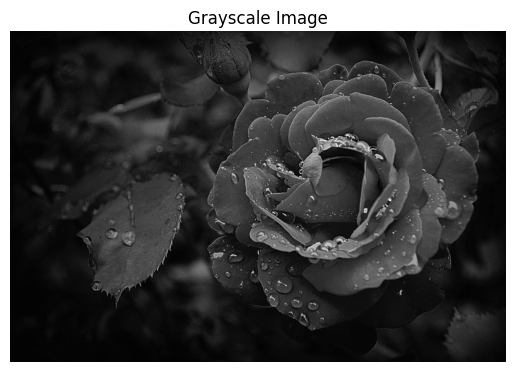

In [9]:
# Provide your image path here
image_path = 'C:\\Users\\DELL\\Downloads\\rose.jpg'
gray_image = color_to_gray(image_path)


### 4. Applying a Mean Filter
The mean filter smooths the image by averaging neighboring pixel values, reducing noise. The function mean_filter takes an image and a parameter k, which controls the filter size.

In [10]:
def mean_filter(image, k):
    # Set the kernel size based on parameter k
    kernel_size = 2 * k + 1
    
    # Apply mean filter
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    
    # Display the filtered image
    plt.figure()
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Mean Filtered Image (k={k})')
    plt.axis('off')
    plt.show()
    
    return filtered_image


#### Usage:

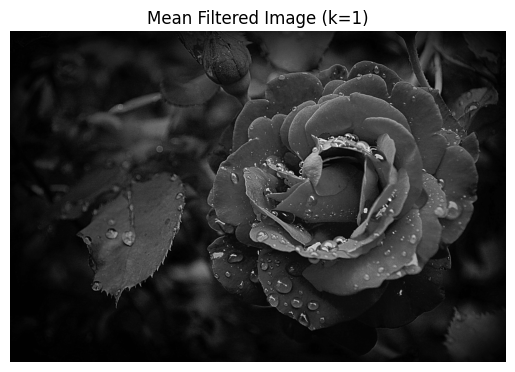

In [11]:
# Apply mean filter with k=1
mean_filtered_image = mean_filter(gray_image, 1)


### 5. Implementing a Custom Convolution Filter
We can apply custom filters to an image by defining our own convolution function, OURconv_filter. This function manually applies a kernel over the image.

In [12]:
def OURconv_filter(image, kernel):
    # Get dimensions of image and kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Initialize an output image
    output_image = np.zeros((img_height, img_width))

    # Calculate padding
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Pad the input image
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output_value = np.dot(region.flatten(), kernel.flatten())
            output_image[i, j] = output_value

    # Clip values to be in 0-255 range and convert to uint8
    output_image = np.clip(output_image, 0, 255).astype(np.uint8)
    
    # Display the result
    plt.figure()
    plt.imshow(output_image, cmap='gray')
    plt.title('Our Convolution Filtered Image')
    plt.axis('off')
    plt.show()
    
    return output_image


#### Usage:


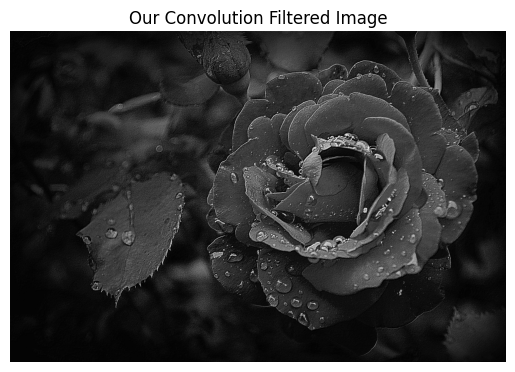

In [13]:
# Apply custom convolution filter using the emboss filter
OURConvolution_filtered_image = OURconv_filter(gray_image, emboss_filter)


### 6. Using OpenCV’s Built-In Convolution Filter
OpenCV provides an optimized method for applying filters: cv2.filter2D. This function is faster and more efficient than manual convolution.

In [14]:
def CVconv_filter(image, kernel):
    # Apply convolution using OpenCV's filter2D function
    CVConvolution_filtered_image = cv2.filter2D(image, -1, kernel)
    
    # Display the result
    plt.figure()
    plt.imshow(CVConvolution_filtered_image, cmap='gray')
    plt.title('Using filter2D() Convolution Filtered Image')
    plt.axis('off')
    plt.show()
    
    return CVConvolution_filtered_image


#### Usage:

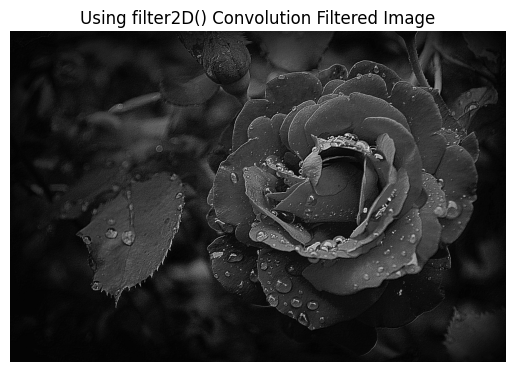

In [15]:
# Apply filter2D convolution with the emboss filter
CVConvolution_filtered_image = CVconv_filter(gray_image, emboss_filter)


### 7. Edge Detection Using Prewitt Filter
Edge detection is a fundamental operation in image processing. The Prewitt filter is used to detect horizontal and vertical edges by applying convolution.

In [16]:
def prewitt_filter(image):
    # Define Prewitt filter kernels
    prewitt_x = np.array([[1, 0, -1],
                          [1, 0, -1], 
                          [1, 0, -1]])
    
    prewitt_y = np.array([[1, 1, 1], 
                          [0, 0, 0],
                          [-1, -1, -1]])
    
    # Apply Prewitt filter in x and y directions
    edges_x = cv2.filter2D(image, -1, prewitt_x)
    edges_y = cv2.filter2D(image, -1, prewitt_y)
    
    # Combine edges from x and y directions
    edges = np.sqrt(edges_x**2 + edges_y**2).astype(np.uint8)
    
    # Display the edges
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title('Edges Detected using Prewitt Filter')
    plt.axis('off')
    plt.show()
    
    return edges


#### Usage:

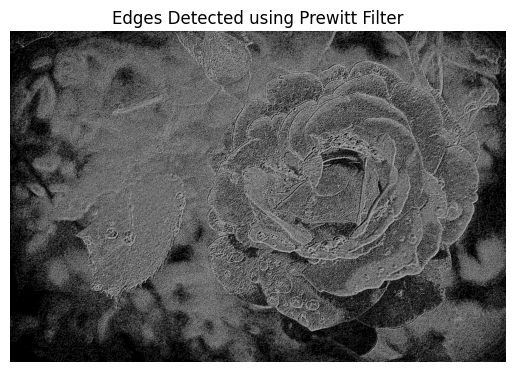

In [17]:
# Detect edges using the Prewitt filter
prewitt_edges = prewitt_filter(gray_image)


### 8. Running the Filters on an Image
Now we can put it all together by applying each filter to the image.

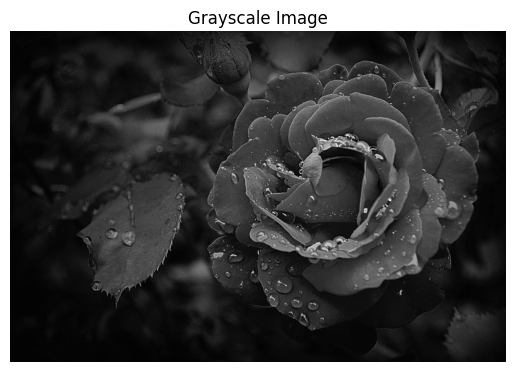

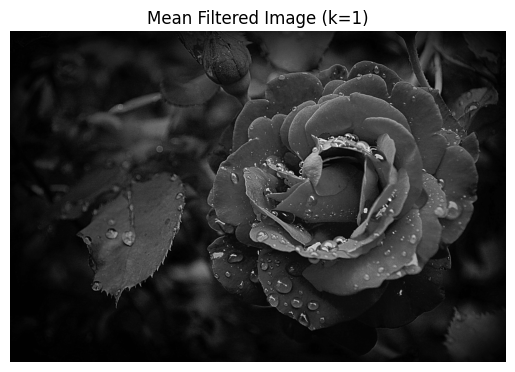

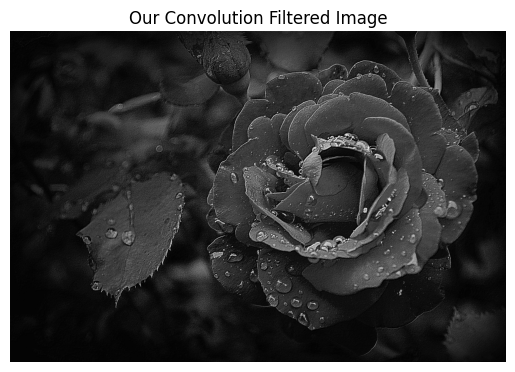

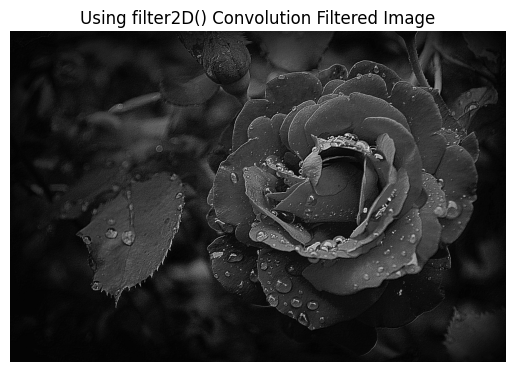

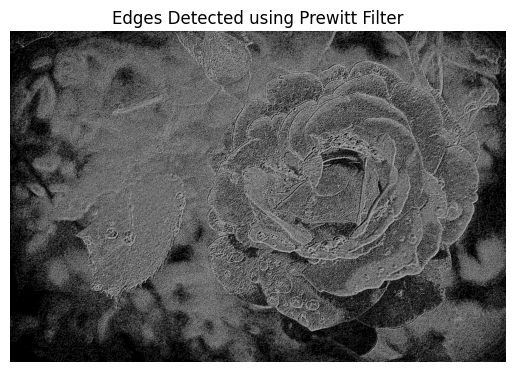

In [18]:
if __name__ == "__main__":
    # Replace with your image path
    image_path = 'C:\\Users\\DELL\\Downloads\\rose.jpg'
    
    # Process and display images
    gray_image = color_to_gray(image_path)
    mean_filtered_image = mean_filter(gray_image, 1)
    OURConvolution_filtered_image = OURconv_filter(gray_image, emboss_filter)
    CVConvolution_filtered_image = CVconv_filter(gray_image, emboss_filter)
    prewitt_edges = prewitt_filter(gray_image)


This will produce and display the processed images with each filter applied.

